In [ ]:
# Import our labraries
# Working with data
import numpy as np
import pandas as pd

# Making plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Classical Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics
from lightgbm import LGBMClassifier
import lightgbm

# Other
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# read our data
kor_df =
test_df =
tr_df =

In [ ]:
tr_df

,Код ТНВЭД,"Вес брутто, кг","Вес нетто, кг","Таможенная стоимость, сом",Признак прав/ не прав,код МТО,Справочный ГТД 2,Страна отправления,Кол - во доп. ед,Таможенные сборы,Таможенные пошлины,Акцизный налог,НДС,Всего по начис. платежам
0,9401200009,100.0,100.0,41960.73,1.0,41714102,40121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9401200009,101.0,101.0,25946.13,1.0,41714102,40121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9401200009,385.0,385.0,162090.49,1.0,41714102,120121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9401200009,420.0,420.0,178357.77,1.0,41714102,180121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9401200009,240.0,240.0,208488.01,1.0,41714102,250121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,8409990001,251.0,251.0,286134.77,0.0,41714101,40618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,8409990001,22.3,22.3,460576.10,0.0,41714203,210518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,8409990001,939.0,927.0,29699.74,0.0,41710102,141115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910,8409990001,20525.1,20350.0,1665402.84,0.0,41710102,130116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = pd.read_excel('база для ИИ.xlsx')
df2 = pd.read_excel('для обучения ИИ 1.xlsx')
df3 = pd.read_excel('для обучения ИИ 3.xlsx')
df1.rename(columns={'Вес брутто, кг ': 'Вес брутто, кг'}, inplace=True)
df2.rename(columns={'Вес брутто, кг ': 'Вес брутто, кг'}, inplace=True)
df3.rename(columns={'Вес брутто, кг ': 'Вес брутто, кг'}, inplace=True)
df2.drop('Комментарий', inplace=True, axis=1)
df3.drop('Комментарий', inplace=True, axis=1)
df3['Наименование товара'] = 0
df1.drop('Наименование товара', inplace=True, axis=1)
df2.drop('Наименование товара', inplace=True, axis=1)
df3.drop('Наименование товара', inplace=True, axis=1)
df1['Статист. стоимость, дол.'] = 0
df3['Статист. стоимость, дол.'] = 0
df1.drop('Статист. стоимость, дол.', inplace=True, axis=1)
df2.drop('Статист. стоимость, дол.', inplace=True, axis=1)
df3.drop('Статист. стоимость, дол.', inplace=True, axis=1)
df1['Страна происхождения'] = 0
df3['Страна происхождения'] = 0
df1.drop('Страна происхождения', inplace=True, axis=1)
df2.drop('Страна происхождения', inplace=True, axis=1)
df3.drop('Страна происхождения', inplace=True, axis=1)

In [ ]:
((df1.columns) ^ (df2.columns)) | ((df1.columns) ^ (df3.columns))

Index([], dtype='object')

In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Наименование получателя', '№ товара', 'Код ТНВЭД', 'Вес брутто, кг',
       'Вес нетто, кг', 'Таможенная стоимость, сом', 'Справочный ГТД',
       'Признак прав/ не прав'],
      dtype='object')
Index(['Наименование получателя', 'Код ТНВЭД', '№ товара', 'Вес брутто, кг',
       'Вес нетто, кг', 'Таможенная стоимость, сом', 'Справочный ГТД',
       'Признак прав/ не прав'],
      dtype='object')
Index(['Наименование получателя', 'Код ТНВЭД', '№ товара', 'Вес брутто, кг',
       'Вес нетто, кг', 'Таможенная стоимость, сом', 'Справочный ГТД',
       'Признак прав/ не прав'],
      dtype='object')


In [ ]:
df = pd.concat([df1, df2, df3])
df

,Наименование получателя,№ товара,Код ТНВЭД,"Вес брутто, кг","Вес нетто, кг","Таможенная стоимость, сом",Справочный ГТД,Признак прав/ не прав
0,МУРЗАКУЛОВ САМАГАН РЫСБАЕВИЧ,11,9401200009,100.0,100.0,41960.73,41714102/040121/0000023,1
1,ЗАКИРОВ РУСТАМ ЭРГЕШЕВИЧ,9,9401200009,101.0,101.0,25946.13,41714102/040121/0000030,1
2,МАКСЫТОВ АЛЫМБЕК ОКТОМОВИЧ,26,9401200009,385.0,385.0,162090.49,41714102/120121/0000153,1
3,ИБРАГИМОВ ИБРОХИМЖОН СУХБАТЫЛЛОЕВИЧ,20,9401200009,420.0,420.0,178357.77,41714102/180121/0000193,1
4,КАСЫМАЛИЕВ ЭРКИН КАНАТОВИЧ,16,9401200009,240.0,240.0,208488.01,41714102/250121/0000259,1
...,...,...,...,...,...,...,...,...
127,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,251.0,251.0,286134.77,41714101/040618/0005518,0
128,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,22.3,22.3,460576.10,41714203/210518/0000367,0
129,АБДЫЛЛАЕВ МИРБЕК АБДЫКАЛЫКОВИЧ,2,8409990001,939.0,927.0,29699.74,41710102/141115/0003192,0
130,АБДИЖАЛИЛОВ ЖУСУПАЛИ ЫСМАНАЛИЕВИЧ,1,8409990001,20525.1,20350.0,1665402.84,41710102/130116/0000455,0


In [ ]:
df.drop_duplicates()

,Наименование получателя,№ товара,Код ТНВЭД,"Вес брутто, кг","Вес нетто, кг","Таможенная стоимость, сом",Справочный ГТД,Признак прав/ не прав
0,МУРЗАКУЛОВ САМАГАН РЫСБАЕВИЧ,11,9401200009,100.0,100.0,41960.73,41714102/040121/0000023,1
1,ЗАКИРОВ РУСТАМ ЭРГЕШЕВИЧ,9,9401200009,101.0,101.0,25946.13,41714102/040121/0000030,1
2,МАКСЫТОВ АЛЫМБЕК ОКТОМОВИЧ,26,9401200009,385.0,385.0,162090.49,41714102/120121/0000153,1
3,ИБРАГИМОВ ИБРОХИМЖОН СУХБАТЫЛЛОЕВИЧ,20,9401200009,420.0,420.0,178357.77,41714102/180121/0000193,1
4,КАСЫМАЛИЕВ ЭРКИН КАНАТОВИЧ,16,9401200009,240.0,240.0,208488.01,41714102/250121/0000259,1
...,...,...,...,...,...,...,...,...
127,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,251.0,251.0,286134.77,41714101/040618/0005518,0
128,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,22.3,22.3,460576.10,41714203/210518/0000367,0
129,АБДЫЛЛАЕВ МИРБЕК АБДЫКАЛЫКОВИЧ,2,8409990001,939.0,927.0,29699.74,41710102/141115/0003192,0
130,АБДИЖАЛИЛОВ ЖУСУПАЛИ ЫСМАНАЛИЕВИЧ,1,8409990001,20525.1,20350.0,1665402.84,41710102/130116/0000455,0


In [ ]:
df[df['Наименование получателя'] == 'ОсОО "SHARKS" (ШАРКС)']

,Наименование получателя,№ товара,Код ТНВЭД,"Вес брутто, кг","Вес нетто, кг","Таможенная стоимость, сом",Справочный ГТД,Признак прав/ не прав
123,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,260.0,260.0,783325.02,41710102/051117/0021993,0
124,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,606.0,578.0,1097788.80,41710102/160917/0018072,0
125,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,66.0,59.0,750502.71,41710102/281017/0021425,0
126,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,147.0,139.0,492056.06,41710102/281017/0021426,0
127,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,251.0,251.0,286134.77,41714101/040618/0005518,0
128,"ОсОО ""SHARKS"" (ШАРКС)",1,8409990001,22.3,22.3,460576.10,41714203/210518/0000367,0


In [ ]:
set(tr_df['Код ТНВЭД'].values)

{8409990001,
 8409990009,
 9401200001,
 9401200009,
 9403500009,
 9403601009,
 9403609009}

In [ ]:
test_df

,Код ТНВЭД,"Вес брутто, кг","Вес нетто, кг","Таможенная стоимость, сом",Признак прав/ не прав,код МТО,Справочный ГТД 2,Страна отправления,Кол - во доп. ед,Таможенные сборы,Таможенные пошлины,Акцизный налог,НДС,Всего по начис. платежам
0,9401200009,100.0,100.0,41960.73,1.0,41714102,40121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9401200009,101.0,101.0,25946.13,1.0,41714102,40121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9401200009,385.0,385.0,162090.49,1.0,41714102,120121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9401200009,420.0,420.0,178357.77,1.0,41714102,180121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9401200009,240.0,240.0,208488.01,1.0,41714102,250121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,8409990001,251.0,251.0,286134.77,0.0,41714101,40618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,8409990001,22.3,22.3,460576.10,0.0,41714203,210518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,8409990001,939.0,927.0,29699.74,0.0,41710102,141115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910,8409990001,20525.1,20350.0,1665402.84,0.0,41710102,130116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = tr_df.iloc[1907: 1908].drop('Признак прав/ не прав', axis=1).values
data

array([[8.4099900e+09, 2.5100000e+02, 2.5100000e+02, 2.8613477e+05,
        4.1714101e+07, 4.0618000e+04,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan]])

In [ ]:
model.predict(data)

array([1.])

In [ ]:
test_df.rename(columns={'Вес брутто, кг ': 'Вес брутто, кг',
                        'Кол  - во доп. ед': 'Кол - во доп. ед'}, inplace=True)
tr_df.rename(columns={'Вес брутто, кг ': 'Вес брутто, кг',
                      'Кол  - во доп. ед': 'Кол - во доп. ед'}, inplace=True)

In [ ]:
kor_df[['Акцизный налог', 'НДС']] = kor_df[['НДС', 'Акцизный налог']]

In [ ]:
test_df.replace('010218фй  ', '010218', inplace=True)

In [ ]:
test_df['Справочный ГТД 2'] = test_df['Справочный ГТД 2'].astype(int)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415476 entries, 0 to 415475
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Код ТНВЭД                  415476 non-null  int64  
 1   Вес брутто, кг             415476 non-null  float64
 2   Вес нетто, кг              415476 non-null  float64
 3   Таможенная стоимость, сом  415476 non-null  float64
 4   Признак прав/ не прав      0 non-null       float64
 5   код МТО                    415476 non-null  int64  
 6   Справочный ГТД 2           415476 non-null  int64  
 7   Страна отправления         415476 non-null  float64
 8   Кол - во доп. ед           415476 non-null  float64
 9   Таможенные сборы           415476 non-null  float64
 10  Таможенные пошлины         415476 non-null  float64
 11  Акцизный налог             415476 non-null  float64
 12  НДС                        415476 non-null  float64
 13  Всего по начис. платежам   41

In [ ]:
# Get features and labels
tr_df.drop('Страна отправления', axis=1, inplace=True)
kor_df.drop('Страна отправления', axis=1, inplace=True)
x = tr_df.copy()
y = x.pop('Признак прав/ не прав')
x_kor = kor_df.copy()
y_kor = x_kor.pop('Признак прав/ не прав')

# Split data to train/validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
model = LGBMClassifier(class_weights='is_unbalance', n_jobs=-1)

In [ ]:
x_train = pd.concat([x_train, x_kor])
y_train = pd.concat([y_train, y_kor])

In [ ]:
model.fit(x_train.values, y_train)

[LightGBM] [Warning] Unknown parameter: class_weights


LGBMClassifier(class_weights='is_unbalance')

In [ ]:
# Make prediction
model_pred = model.predict_proba(x_test)
model_pred = np.where(model_pred[:, 0] > 0.75, 0, 1)

print('Random Forest Results:')

# Calculate Confusion matrix
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, model_pred))
print('---------------------------')

# Calculate main metrics
print(f'Area Under the ROC: {round(metrics.roc_auc_score(y_test, model_pred), 5)}')
print(f'Matthews Corrcoef: {round(metrics.matthews_corrcoef(y_test, model_pred), 5):>8}')
print('---------------------------')

# Calculate classical metrics
print(f'Accuracy score: {round(metrics.accuracy_score(y_test, model_pred), 5):>11}')
print(f'Precision score: {round(metrics.precision_score(y_test, model_pred), 5):>10}')
print(f'Recall score: {round(metrics.recall_score(y_test, model_pred), 5):>13}')
print(f'F1 score : {round(metrics.f1_score(y_test, model_pred), 5):>16}')

Random Forest Results:
Confusion matrix:
[[ 47   0]
 [  0 431]]
---------------------------
Area Under the ROC: 1.0
Matthews Corrcoef:      1.0
---------------------------
Accuracy score:         1.0
Precision score:        1.0
Recall score:           1.0
F1 score :              1.0


In [ ]:
model

LGBMClassifier(class_weights='is_unbalance')

In [ ]:
import joblib
import pickle

In [ ]:
joblib.dump(model, 'model.joblib')
pickle.dump(model, open('model.sav', 'wb'))

 1) Код ТНВЭД                      799.000000
 2) Вес брутто, кг                 790.000000
 3) Вес нетто, кг                  779.000000
 4) Таможенная стоимость, сом      524.000000
 5) код МТО                        55.000000
 6) Справочный ГТД 2               53.000000
 7) Кол - во доп. ед               0.000000
 8) Таможенные сборы               0.000000
 9) Таможенные пошлины             0.000000
10) Акцизный налог                 0.000000
11) НДС                            0.000000
12) Всего по начис. платежам       0.000000


<BarContainer object of 12 artists>

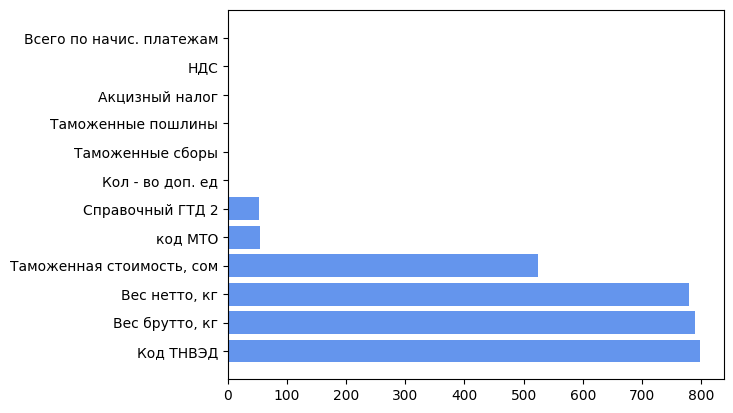

In [ ]:
feat_labels = tr_df.drop('Признак прав/ не прав', axis=1).columns
importancies = model.feature_importances_
idx = np.argsort(importancies)[::-1]
for f in range(x.shape[1]):
    print(f'%2d) %-*s %f' % (f + 1, 30, feat_labels[f], importancies[idx[f]]))
plt.barh(feat_labels, importancies[idx], color='cornflowerblue')

In [ ]:
model_pred = model.predict_proba(x_test)

In [ ]:
for pred1, pred2 in model_pred:


In [ ]:
np.where(model_pred[:, 0] > 0.75, 0, 1)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
x_tst = test_df.copy()
y_tst = x_tst.pop('Признак прав/ не прав')

In [ ]:
model_pred = model.predict_proba(x_tst)
model_pred = np.where(model_pred[:, 0] > 0.5, 0, 1)

In [ ]:
(model_pred==0).sum()

36199

In [ ]:
(model_pred==1).sum()

379277

# Nurs was here 😊😊😊

In [ ]:
temp_data = pd.DataFrame({'num':[(model_pred==1).sum(),(model_pred==0).sum()], 'pred':['Ones','Zerous']})
temp_data.head()

,num,pred
0,379277,Ones
1,36199,Zerous


In [ ]:
temp_data_1 = pd.DataFrame({'num':[1726,186], 'pred':['Ones','Zerous']})
temp_data_1.head()

,num,pred
0,1726,Ones
1,186,Zerous


In [ ]:
figure1 = px.pie(temp_data_1, values='num', names='pred', title='Some title')
figure2 = px.pie(temp_data, values='num', names='pred', title='Some title')

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], subplot_titles=('У нас на тесте',  'У нас в трейне'))


fig.add_trace(go.Pie(
     values=[(model_pred==1).sum(),(model_pred==0).sum()],
     labels=['Прав', 'Не прав'],
     domain=dict(x=[0, 0.5]),
     name="test"),
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[1726,186],
     labels=['Прав', 'Не прав'],
     domain=dict(x=[0.5, 1.0]),
     name="train"),
     row=1, col=2)

fig

<Axes: title={'center': 'Value counts per each class'}>

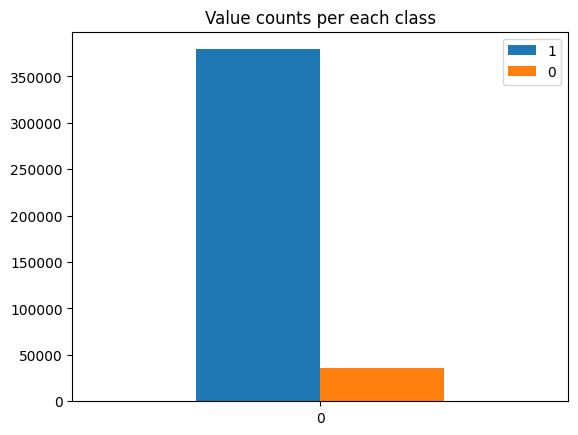

In [ ]:
pd.DataFrame({1:[(model_pred==1).sum()], 0:[(model_pred==0).sum()]}).plot(kind = 'bar', rot = 0, title='Value counts per each class')

In [ ]:
x_tst

,Код ТНВЭД,"Вес брутто, кг","Вес нетто, кг","Таможенная стоимость, сом",код МТО,Справочный ГТД 2,Страна отправления,Кол - во доп. ед,Таможенные сборы,Таможенные пошлины,Акцизный налог,НДС,Всего по начис. платежам
0,8516601090,24660.00,22598.0,2781900.03,41710102,10218,0.0,834.0,7357.57,278190.00,0.0,367210.80,652758.37
1,8516608000,684.00,589.0,161126.84,41710102,10218,0.0,19.0,0.00,16112.68,0.0,21268.74,37381.42
2,3402209000,10552.33,9690.0,563807.16,41710102,10218,0.0,0.0,4165.81,36647.47,0.0,72054.56,112867.84
3,3924900009,1647.00,1502.2,205470.92,41710102,10218,0.0,0.0,0.00,13355.61,0.0,26259.18,39614.79
4,3305100000,2394.00,2160.0,295444.80,41710102,10218,0.0,0.0,0.00,19203.91,0.0,37757.85,56961.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415471,8542319090,27.40,27.4,1533174.27,41781002,311218,12.0,2.0,3832.94,0.00,0.0,183980.91,187813.85
415472,9018905009,357.00,238.0,831367.99,41781002,311218,36.0,750.0,2078.42,0.00,0.0,0.00,2078.42
415473,603110000,94.50,87.0,70681.22,41781002,311218,70.0,1760.0,215.56,3534.06,0.0,8905.83,12655.45
415474,603140000,31.50,29.0,15541.63,41781002,311218,70.0,280.0,0.00,777.08,0.0,1958.25,2735.33
